In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [ ]:
'''
token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio'
'''

In [ ]:
#Creating db file from csv
if not os.path.isfile('/content/drive/MyDrive/case studies/Docs_QUORA/train.db'):
    disk_engine = create_engine('sqlite:////content/drive/MyDrive/case studies/Docs_QUORA/train.db')
    start = dt.datetime.now()
    chunksize = 18000
    j = 0
    index_start = 1
    for df in pd.read_csv('/content/drive/MyDrive/case studies/Docs_QUORA/final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

18000 rows
36000 rows
54000 rows
72000 rows
90000 rows
108000 rows
126000 rows
144000 rows
162000 rows
180000 rows
198000 rows
216000 rows
234000 rows
252000 rows
270000 rows
288000 rows
306000 rows
324000 rows
342000 rows
360000 rows
378000 rows
396000 rows
414000 rows


In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [ ]:
read_db = '/content/drive/MyDrive/case studies/Docs_QUORA/train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [ ]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [ ]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.66664444518516,0.399992000159997,0.66664444518516,0.399992000159997,0.666655555740738,0.39999600004,0.0,1.0,4.0,8.0,1,1,54,29,10,6,3.0,16.0,0.1875,2,0,56.3381819725037,-29.2011052668095,-60.2023931667209,81.8882687091827,73.6501999348402,28.6007482828572,54.9365876317024,42.3410155922175,117.501404285431,49.3869193792343,-28.0890576839447,28.0665070414543,18.900511264801,-93.3905958533287,-2.93747818470001,-36.6791306734085,-51.0260915756226,63.7188351750374,-89.4579260647297,...,102.172656178474,87.8651622757316,-50.4748477935791,6.83893129229546,-69.5534303188324,-86.3896586894989,136.240003585815,-32.7976665496826,75.2516721487045,75.645473241806,34.7345985174179,-55.4546201229095,-30.3173743784428,18.0498472712934,-44.7792237997055,-81.4689875841141,-69.834003329277,9.83064234256744,8.26456570625305,-4.1403656899929,75.563134431839,-89.5889868140221,49.0541667938232,29.6019518375397,58.9114861488342,-91.8466820716858,-14.340111553669,65.3547911643982,-17.302480340004,-27.3674051836133,-30.7978744506836,40.9751616418362,-24.0491600036621,-28.8679299354553,-54.6918141245842,-3.35834872722626,-14.1782232522964,33.7269928455353,108.682813048363,69.3437738418579
2,0.624992187597655,0.624992187597655,0.66664444518516,0.222219753113854,0.538457396481566,0.368419113583613,0.0,0.0,6.0,16.0,2,1,84,90,13,18,6.0,27.0,0.222222222222222,3,1,61.2027287445962,6.73045653104782,-85.512718886137,102.514895737171,118.611478157341,22.2411887794733,45.0511970743537,115.85792183876,137.634769558907,164.596428990364,-7.42504802346229,-30.1381897926331,-9.18269205093384,-109.316783308983,37.5616658462677,-19.5764589309692,-91.111073166132,48.8985878527165,-91.0871784090996,...,114.875978946686,64.6200637817383,-1.33762717247009,107.191681176424,67.7048461735249,-120.085018787533,9.75458025932312,46.4969965517521,26.623181283474,-78.4657756686211,62.4296246767044,-14.0316956043243,-108.881883561611,89.2897318601608,-77.6653035879135,2.13152158260345,-12.7667045593262,7.66395235061646,-10.8637229800224,49.7235740348697,188.948847413063,-74.3267582654953,23.1309005953371,10.83303193748,-22.5705338120461,-97.1932957470417,-28.8917798399925,30.7467567026615,39.5456535816193,-70.5479166507721,-60.7556113898754,21.4544054828584,-49.3684753626585,73.7597567141056,-23.2416896820068,-61.124863088131,-35.6289678812027,9.60826069116592,43.6472146511078,31.6503430008888
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,1,1,48,53,8,10,0.0,17.0,0.0,2,0,-29.8036849498749,-4.99657121300697,-27.4548196196556,-12.747367143631,115.302695989609,60.227314569056,31.9865153729916,2.03084322065115,35.0877379775047,78.9063498973846,-21.9374616146088,-14.826836489141,-50.4242105484009,-40.1828887015581,45.7924163341522,35.7074435949326,-12.8089842498302,-3.06441557407379,-41.9343994855881,...,30.7821915149689,27.3458013534546,-6.84034623671323,-47.3364216387272,99.3884214162826,13.6621527671814,-25.5663677453995,22.9676673412323,-31.9233888313174,-39.4999519586563,67.6269807219505,-20.7500180602074,55.1316970586777,84.913167476654,-30.4176516532898,46.4686522483826,20.6453287005424,-22.5415985882282,-25.0518394708633,-16.6266224384308,54.8290530443192,-107.112268093973,-58.5608676793054,-43.6827988624573,-0.39334899187088,90.6175458431244,-33.354927778244,21.4071970432997,-6.45781537890434,-41.0218988209963,-10.5439910888672,-20.1397111415863,-33.247158408165,17.4562784433365,-3.80696090124547,-69.8365105390549,-9.73489093780518,36.5486228466034,-5.37298919260502,46.7299688756466
4,0.666644

<h2> 4.2 Converting strings to numerics </h2>

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)


cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y
50_y
51_y
52_y
53_y
54_y
55_y
56_y
57_y
58_y
59_y
60_y
61_y
62_y
63_y
64_y
65_y
66_

In [ ]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.666644,0.399992,0.666644,0.399992,0.666656,0.399996,0.0,1.0,4.0,8.0,1,1,54,29,10,6,3.0,16.0,0.187500,2,0,56.338182,-29.201105,-60.202393,81.888269,73.650200,28.600748,54.936588,42.341016,117.501404,49.386919,-28.089058,28.066507,18.900511,-93.390596,-2.937478,-36.679131,-51.026092,63.718835,-89.457926,...,102.172656,87.865162,-50.474848,6.838931,-69.553430,-86.389659,136.240004,-32.797667,75.251672,75.645473,34.734599,-55.454620,-30.317374,18.049847,-44.779224,-81.468988,-69.834003,9.830642,8.264566,-4.140366,75.563134,-89.588987,49.054167,29.601952,58.911486,-91.846682,-14.340112,65.354791,-17.302480,-27.367405,-30.797874,40.975162,-24.049160,-28.867930,-54.691814,-3.358349,-14.178223,33.726993,108.682813,69.343774
2,0.624992,0.624992,0.666644,0.222220,0.538457,0.368419,0.0,0.0,6.0,16.0,2,1,84,90,13,18,6.0,27.0,0.222222,3,1,61.202729,6.730457,-85.512719,102.514896,118.611478,22.241189,45.051197,115.857922,137.634770,164.596429,-7.425048,-30.138190,-9.182692,-109.316783,37.561666,-19.576459,-91.111073,48.898588,-91.087178,...,114.875979,64.620064,-1.337627,107.191681,67.704846,-120.085019,9.754580,46.496997,26.623181,-78.465776,62.429625,-14.031696,-108.881884,89.289732,-77.665304,2.131522,-12.766705,7.663952,-10.863723,49.723574,188.948847,-74.326758,23.130901,10.833032,-22.570534,-97.193296,-28.891780,30.746757,39.545654,-70.547917,-60.755611,21.454405,-49.368475,73.759757,-23.241690,-61.124863,-35.628968,9.608261,43.647215,31.650343
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,9.0,1,1,48,53,8,10,0.0,17.0,0.000000,2,0,-29.803685,-4.996571,-27.454820,-12.747367,115.302696,60.227315,31.986515,2.030843,35.087738,78.906350,-21.937462,-14.826836,-50.424211,-40.182889,45.792416,35.707444,-12.808984,-3.064416,-41.934399,...,30.782192,27.345801,-6.840346,-47.336422,99.388421,13.662153,-25.566368,22.967667,-31.923389,-39.499952,67.626981,-20.750018,55.131697,84.913167,-30.417652,46.468652,20.645329,-22.541599,-25.051839,-16.626622,54.829053,-107.112268,-58.560868,-43.682799,-0.393349,90.617546,-33.354928,21.407197,-6.457815,-41.021899,-10.543991,-20.139711,-33.247158,17.456278,-3.806961,-69.836511,-9.734891,36.548623,-5.372989,46.729969
4,0.666644,0.666644,0.999967,0.999967,0.833319,0.833319,1.0,1.0,0.0,6.0,26,2,33,34,6,6,5.0,12.0,0.416667,28,24,33.343531,-39.521155,-51.711996,37.222761,38.629216,53.794117,35.550734,-37.582795,84.834206,51.516288,76.504422,-48.180181,4.971761,-20.116863,-4.187720,-47.476888,-22.142369,10.072637,-21.901836,...,45.969390,40.023101,-14.001630,-13.914062,-46.830657,22.699226,4.498604,46.270939,59.091973,-7.438592,60.284510,19.307041,33.045318,12.206711,-50.146474,-9.165505,3.809267,-11.235177,-38.977818,-0.393588,20.751295,20.249103,-21.812831,-5.912552,26.438849,18.508625,14.146001,51.949021,21.660341,-33.043418,-28.087780,-43.621932,-8.971549,-26.552105,-51.449572,34.540447,62.095874,49.442034,-0.838517,61.814417
5,0.333328,0.249997,0.249994,0.166664,0.249998,0.230767,0.0,0.0,1.0,12.5,1,1,71,67,12,13,2.0,24.0,0.083333,2,0,53.994108,-45.695424,-9.535142,6.070455,111.882267,140.529644,128.047120,41.649747,132.790426,166.258748,107.043579,11.001762,87.439430,-58.484434,-34.060097,-23.543869,62.439441,1.379214,-33.826024,...,28.712647,31.542432,12.420805,73.890019,73.218858,-94.416426,8.109240,50.810964,-14.904770,-3.508955,-21.781992,-115.004952,8.594838,75.854731,30.098756,59.108854,48.387779,26.399338,32.320053,-3.711259,53.090736,-54.241465,-22.018530,-94.651859,-17.011358,-33.571041,-10.

In [ ]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = [int(i) for i in y_true]

In [ ]:
len(data)

100000

<h2> 4.3 Random train test split( 70:30) </h2>

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 213)
Number of data points in test data : (30000, 213)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6326285714285714 Class 1:  0.36737142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.3673666666666667 Class 1:  0.3673666666666667


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)

    
    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8840076935605561


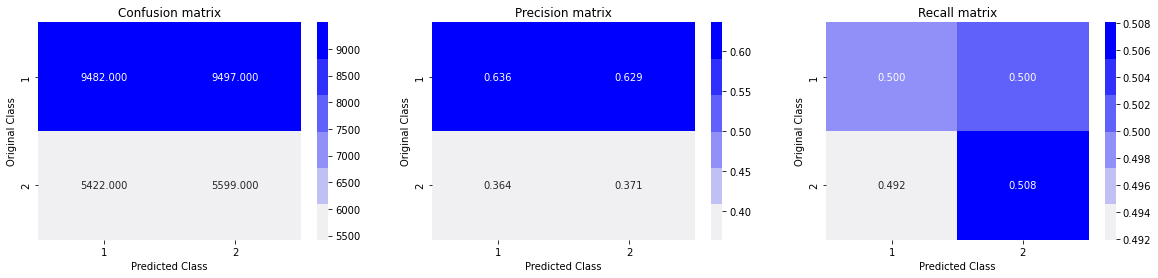

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

In [ ]:
pd.set_option('display.max_columns',None)
X_train.describe()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,44_x,45_x,46_x,47_x,48_x,49_x,50_x,51_x,52_x,53_x,54_x,55_x,56_x,57_x,58_x,59_x,60_x,61_x,62_x,63_x,64_x,65_x,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,74_x,75_x,76_x,77_x,78_x,79_x,80_x,81_x,82_x,83_x,84_x,85_x,86_x,87_x,88_x,89_x,90_x,91_x,92_x,93_x,94_x,95_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,51_y,52_y,53_y,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.587655,0.458848,0.569932,0.433193,0.554641,0.432089,0.319243,0.511200,3

For values of alpha =  1e-05 The log loss is: 0.47083468547838736
For values of alpha =  0.0001 The log loss is: 0.4794329948861991
For values of alpha =  0.001 The log loss is: 0.4990076648633757
For values of alpha =  0.01 The log loss is: 0.5095510629547222
For values of alpha =  0.1 The log loss is: 0.4772697028672929
For values of alpha =  1 The log loss is: 0.49286524751875405
For values of alpha =  10 The log loss is: 0.5414797460272585


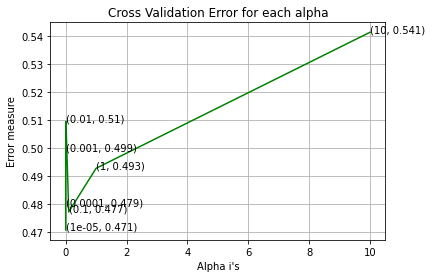

For values of best alpha =  1e-05 The train log loss is: 0.4652463963660982
For values of best alpha =  1e-05 The test log loss is: 0.47083468547838736
Total number of data points : 30000


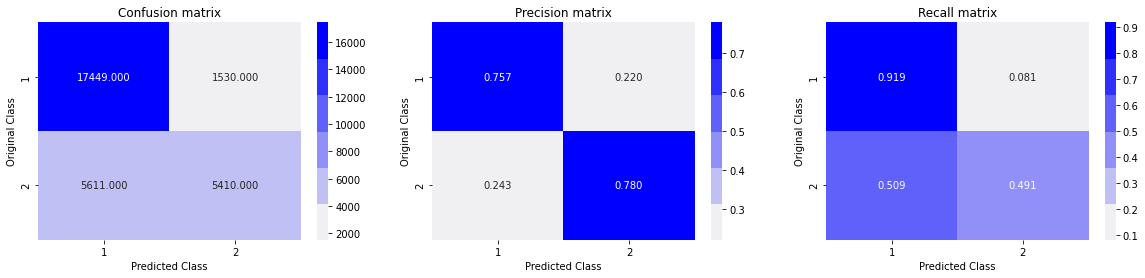

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6575392885590922
For values of alpha =  0.0001 The log loss is: 0.6575392885590922
For values of alpha =  0.001 The log loss is: 0.605294765657937
For values of alpha =  0.01 The log loss is: 0.4736268360165408
For values of alpha =  0.1 The log loss is: 0.5497453141932847
For values of alpha =  1 The log loss is: 0.6503593301398339
For values of alpha =  10 The log loss is: 0.6575392885590922


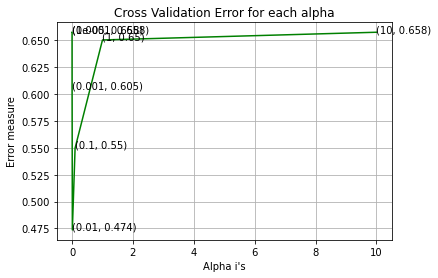

For values of best alpha =  0.01 The train log loss is: 0.4660200338256881
For values of best alpha =  0.01 The test log loss is: 0.4736268360165408
Total number of data points : 30000


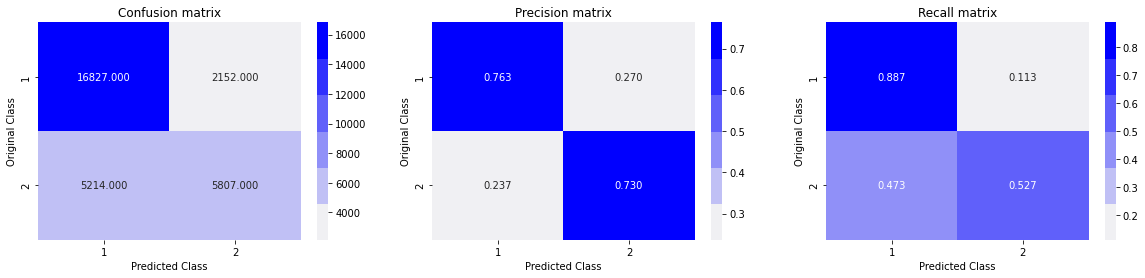

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.




log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684851	valid-logloss:0.684921
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.614327	valid-logloss:0.615017
[20]	train-logloss:0.562856	valid-logloss:0.564037
[30]	train-logloss:0.524309	valid-logloss:0.525795
[40]	train-logloss:0.494977	valid-logloss:0.496635
[50]	train-logloss:0.472051	valid-logloss:0.473895
[60]	train-logloss:0.453992	valid-logloss:0.456104
[70]	train-logloss:0.439562	valid-logloss:0.441733
[80]	train-logloss:0.427688	valid-logloss:0.430054
[90]	train-logloss:0.41818	valid-logloss:0.420672
[100]	train-logloss:0.410347	valid-logloss:0.413002
[110]	train-logloss:0.403871	valid-logloss:0.406738
[120]	train-logloss:0.398433	valid-logloss:0.401464
[130]	train-logloss:0.393928	valid-logloss:0.397102
[140]	train-logloss:0.390169	valid-logloss:0.393488
[150]	train-logloss:0.386906	valid-logloss:0.390365
[160]	train-logloss:0.384143	

Total number of data points : 30000


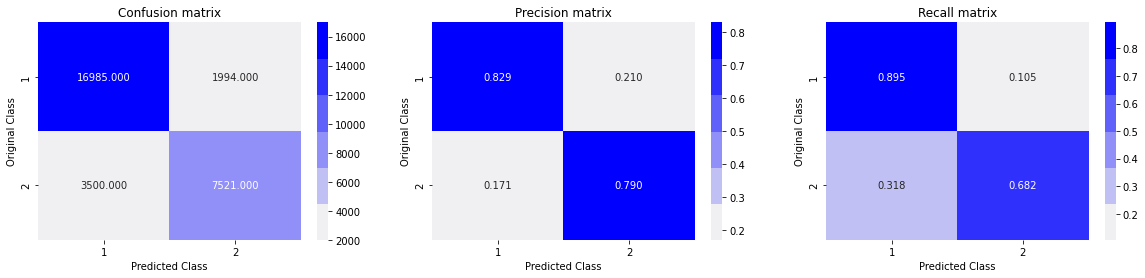

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)